In [1]:
#Mengakses API di covid19.go.id
import requests
resp_jateng = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json', verify=False)
cov_jateng_raw = resp_jateng.json()

C:\Users\ASUS\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
print(resp_jateng.headers)

{'Server': 'nginx', 'Date': 'Fri, 13 May 2022 13:49:53 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Fri, 13 May 2022 13:24:02 GMT', 'ETag': 'W/"627e5bf2-2c815"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [3]:
# Memahami kondisi kasus COVID-19 di Jawa Tengah 
print('Nama-nama elemen utama:\n', cov_jateng_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Tengah                 : %d' %cov_jateng_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Tengah           : %f.2%%' %cov_jateng_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Tengah   : %f.2%%' %cov_jateng_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Tengah                 : 627234
Persentase kematian akibat COVID-19 di Jawa Tengah           : 5.290051.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Tengah   : 94.569491.2%


In [4]:
# Memperoleh informasi yang lebih lengkap tentang COVID-19 di Jawa Tengah

import numpy as np
import pandas as pd
cov_jateng = pd.DataFrame(cov_jateng_raw['list_perkembangan'])
print('Info cov_jateng:\n', cov_jateng.info())
print('\nLima data teratas cov_jateng:\n', cov_jateng.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       794 non-null    int64
 1   KASUS                         794 non-null    int64
 2   MENINGGAL                     794 non-null    int64
 3   SEMBUH                        794 non-null    int64
 4   DIRAWAT_OR_ISOLASI            794 non-null    int64
 5   AKUMULASI_KASUS               794 non-null    int64
 6   AKUMULASI_SEMBUH              794 non-null    int64
 7   AKUMULASI_MENINGGAL           794 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  794 non-null    int64
dtypes: int64(9)
memory usage: 56.0 KB
Info cov_jateng:
 None

Lima data teratas cov_jateng:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583625600000      1          1       0                   0   
1  1583712000000      0          0       0 

In [5]:
# Merapikan data COVID-19 di Jawa Tengah
cov_jateng_tidy = (cov_jateng.drop(columns=[item for item in cov_jateng.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jateng_tidy['tanggal'] = pd.to_datetime(cov_jateng_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jateng_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-08           1          1       0
1 2020-03-09           0          0       0
2 2020-03-10           0          0       0
3 2020-03-11           2          1       1
4 2020-03-12           0          0       0


C:\Users\ASUS\AppData\Local\Temp/ipykernel_3896/2865378810.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

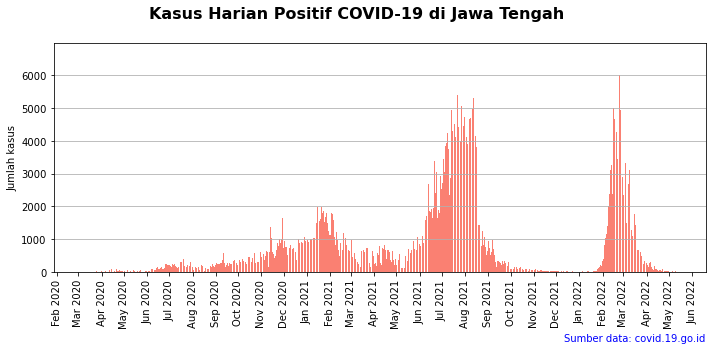

In [6]:
# Membuat visualisasi perkembangan jumlah kasus COVID-19 di Jawa Tengah
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Tengah', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3896/3606313754.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

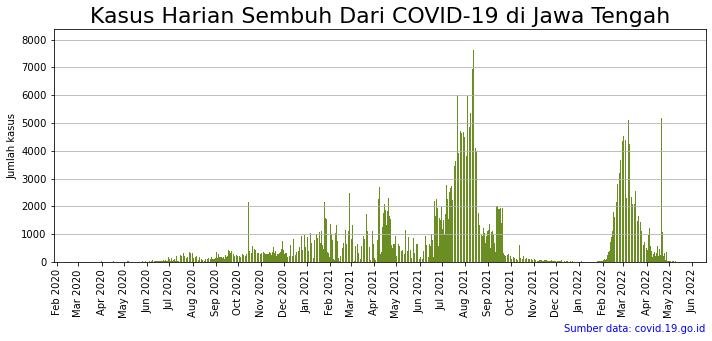

In [7]:
# Membuat visualisasi perkembangan kasus harian sembuh COVID-19 di Jawa Tengah

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Tengah',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3896/134667602.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

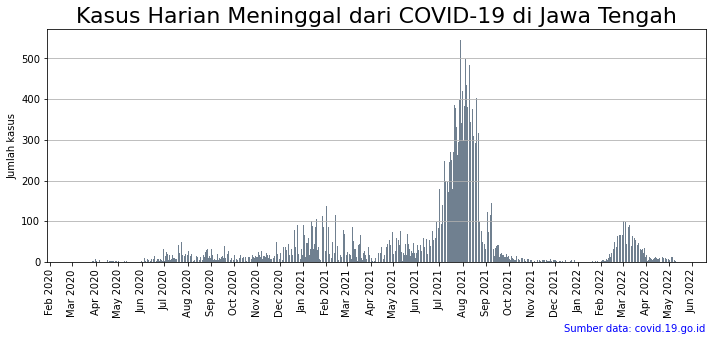

In [8]:
# Membuat visualisasi perkembangan kasus harian meninggal COVID-19 di Jawa Tengah

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal dari COVID-19 di Jawa Tengah',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
# Membuat kasus perkembangan Covid-19 per pekan di Jawa Tengah

cov_jateng_pekanan = (cov_jateng_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jateng_pekanan['tahun'] = cov_jateng_pekanan['tanggal'].apply(lambda x: x.year)
cov_jateng_pekanan['pekan_ke'] =cov_jateng_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jateng_pekanan = cov_jateng_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jateng_pekanan:')
print(cov_jateng_pekanan.info())
print('\nLima data teratas cov_jateng_pekanan:\n', cov_jateng_pekanan.head())

Info cov_jateng_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     115 non-null    int64
 1   pekan_ke  115 non-null    int64
 2   jumlah    115 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
None

Lima data teratas cov_jateng_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       1
1   2020        11       5
2   2020        12      13
3   2020        13      67
4   2020        14      93


In [10]:
""""Membuat kolom jumlah pekanlalu dan kolom perbandingan antara jumlah kasus pekan lalu dengan sekarang, 
apakah menjadi lebih sedikit atau tidak"""
cov_jateng_pekanan['jumlah_pekanlalu'] = cov_jateng_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int64)
cov_jateng_pekanan['lebih_baik'] = cov_jateng_pekanan['jumlah'] < cov_jateng_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jateng_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       1                 0       False
1   2020        11       5                 1       False
2   2020        12      13                 5       False
3   2020        13      67                13       False
4   2020        14      93                67       False
5   2020        15     119                93       False
6   2020        16     210               119       False
7   2020        17     350               210       False
8   2020        18     176               350        True
9   2020        19     246               176       False


<Figure size 432x288 with 0 Axes>

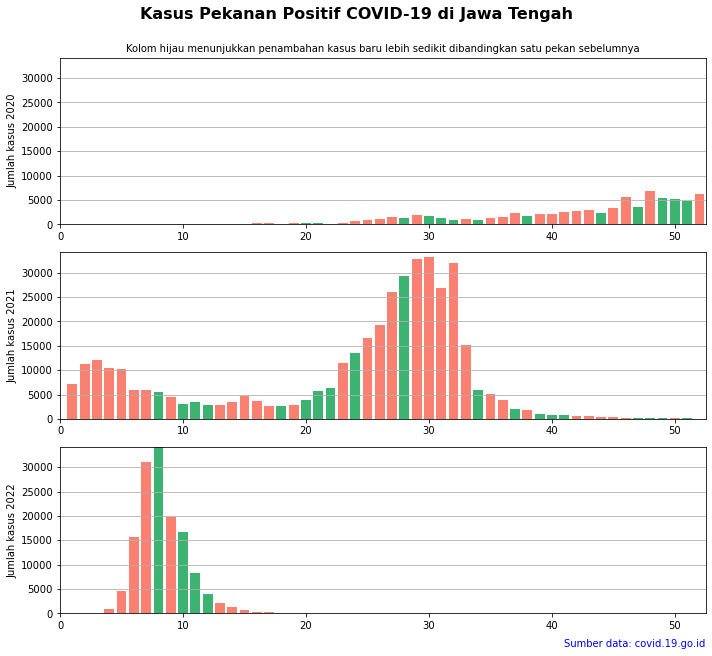

In [11]:
# Membuat Bar Chart
plt.clf()
jml_tahun_terjadi_covid19 = cov_jateng_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jateng_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Tengah', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_jateng_pekanan.loc[cov_jateng_pekanan['tahun']==tahun_terjadi_covid19[i]], 
           x='pekan_ke', height='jumlah', 
           color=['mediumseagreen' if x is True else 'salmon' 
                  for x in cov_jateng_pekanan['lebih_baik']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
            ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_jateng_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [13]:
cov_jateng_akumulasi = cov_jateng_tidy[['tanggal']].copy()
cov_jateng_akumulasi['akumulasi_aktif'] = (cov_jateng_tidy['kasus_baru'] - cov_jateng_tidy['sembuh'] - cov_jateng_tidy['meninggal']).cumsum()
cov_jateng_akumulasi['akumulasi_sembuh'] = cov_jateng_tidy['sembuh'].cumsum()
cov_jateng_akumulasi['akumulasi_meninggal'] = cov_jateng_tidy['meninggal'].cumsum()
print(cov_jateng_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
789 2022-05-06             1436            592561                33150
790 2022-05-07             1423            592584                33157
791 2022-05-08             1407            592613                33163
792 2022-05-09             1379            592652                33169
793 2022-05-10             1368            592695                33171


C:\Users\ASUS\AppData\Local\Temp/ipykernel_3896/1478415244.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

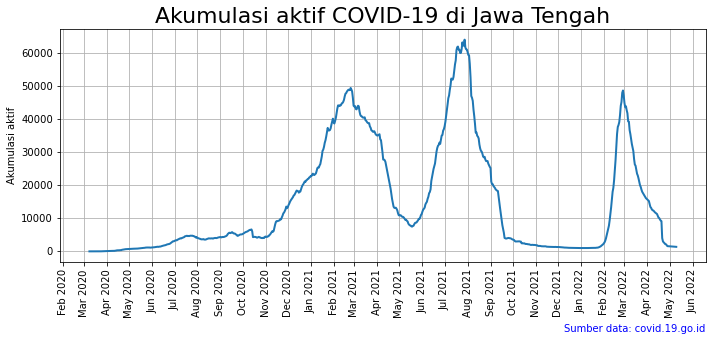

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jateng_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Tengah',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

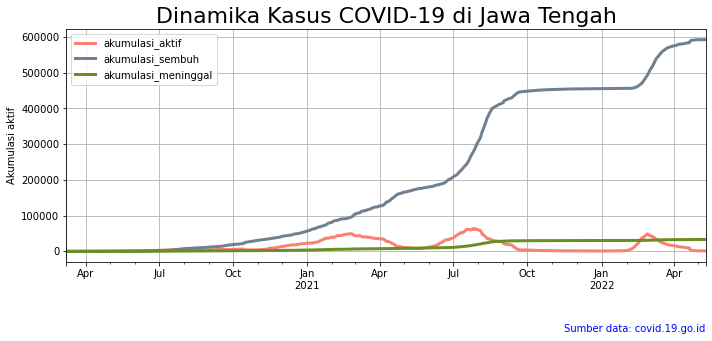

In [15]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jateng_akumulasi_ts = cov_jateng_akumulasi.set_index('tanggal')
cov_jateng_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                            color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Tengah',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()